In [1]:
options(warn=0)

In [2]:
library(WGCNA)
library(DESeq2)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vector

In [3]:
setwd("/data/wgcna/zhanghui_v3")

In [4]:
# Read the gene fpkm table
data0 = read.table("merged.tpm", header = TRUE, sep = "\t")

In [5]:
colnames(data0)

[1] "target_id"  "hggt_10D_1" "hggt_10D_2" "hggt_10D_3" "hggt_20D_1"
 [6] "hggt_20D_2" "hggt_20D_3" "WT_10D_1"   "WT_10D_2"   "WT_10D_3"  
[11] "WT_20D_1"   "WT_20D_2"   "WT_20D_3"

In [6]:
colnames(data0) = c('target_id','hggt_8D_1','hggt_8D_2','hggt_8D_3',
                    'hggt_16D_1','hggt_16D_2','hggt_16D_3',
                    'WT_8D_1','WT_8D_2','WT_8D_3',
                    'WT_16D_1','WT_16D_2','WT_16D_3')

In [7]:
head(data0)

,target_id,hggt_8D_1,hggt_8D_2,hggt_8D_3,hggt_16D_1,hggt_16D_2,hggt_16D_3,WT_8D_1,WT_8D_2,WT_8D_3,WT_16D_1,WT_16D_2,WT_16D_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HORVU.MOREX.r3.1HG0000030.1,13.03070,8.02224,9.81177,4.31599,6.70822,5.13413,10.89640,9.57887,14.6837,4.59355,3.85278,2.648220
2,HORVU.MOREX.r3.1HG0000040.1,47.18170,41.46960,47.92280,24.49680,23.47860,23.64910,55.25730,51.12740,49.2386,13.37140,9.42113,9.950870
3,HORVU.MOREX.r3.1HG0000050.1,47.38270,42.50090,41.18810,25.89890,25.97290,26.57840,34.98360,38.57170,45.7351,21.49450,20.82710,14.854400
4,HORVU.MOREX.r3.1HG0000060.1,22.32380,18.64610,21.87200,8.92564,7.67433,9.51952,19.81910,17.22270,14.3668,5.03569,3.75181,4.667130
5,HORVU.MOREX.r3.1HG0000070.1,345.73300,312.90300,344.57100,177.57500,155.68900,194.30700,328.87100,327.40400,316.6470,130.22500,92.81230,99.209500
6,HORVU.MOREX.r3.1HG0000080.1,1.92991,1.82328,2.50253,1.67945,1.06344,1.45583,2.14616,1.60033,1.3419,1.23019,0.89228,0.945767


In [8]:
dim(data0)

[1] 37963    13

In [9]:
datExpr0 = as.data.frame(data0[, -c(1)]) ##
rownames(datExpr0) = data0$target_id
datExpr0 = t(datExpr0)
head(datExpr0)

,HORVU.MOREX.r3.1HG0000030.1,HORVU.MOREX.r3.1HG0000040.1,HORVU.MOREX.r3.1HG0000050.1,HORVU.MOREX.r3.1HG0000060.1,HORVU.MOREX.r3.1HG0000070.1,HORVU.MOREX.r3.1HG0000080.1,HORVU.MOREX.r3.1HG0000090.1,HORVU.MOREX.r3.1HG0000110.1,HORVU.MOREX.r3.1HG0000130.1,HORVU.MOREX.r3.1HG0000140.1,⋯,HORVU.MOREX.r3.UnG0815770.1,HORVU.MOREX.r3.UnG0815900.1,HORVU.MOREX.r3.UnG0816010.1,HORVU.MOREX.r3.UnG0816020.1,HORVU.MOREX.r3.UnG0816040.1,HORVU.MOREX.r3.UnG0816160.1,HORVU.MOREX.r3.UnG0816310.1,HORVU.MOREX.r3.UnG0816320.1,HORVU.MOREX.r3.UnG0816490.1,HORVU.MOREX.r3.UnG0816610.1
hggt_8D_1,13.03070,47.1817,47.3827,22.32380,345.733,1.92991,3.18166,11.46600,60.8678,25.5635,⋯,0.2269500,0,0,0,0.001157840,0,0.2269500,0,0.0396612,0
hggt_8D_2,8.02224,41.4696,42.5009,18.64610,312.903,1.82328,3.21960,12.24510,53.3122,20.8341,⋯,0.1258870,0,0,0,0.000207479,0,0.1258870,0,0.0326679,0
hggt_8D_3,9.81177,47.9228,41.1881,21.87200,344.571,2.50253,3.56736,12.55190,62.5327,25.3633,⋯,0.1292130,0,0,0,0.000000000,0,0.1292130,0,0.0552127,0
hggt_16D_1,4.31599,24.4968,25.8989,8.92564,177.575,1.67945,2.01375,8.93963,34.5973,10.9870,⋯,0.0590349,0,0,0,0.003808600,0,0.0590349,0,0.0197909,0
hggt_16D_2,6.70822,23.4786,25.9729,7.67433,155.689,1.06344,2.00732,7.63070,32.0121,10.6602,⋯,0.1480690,0,0,0,0.000000000,0,0.1480690,0,0.0227355,0
hggt_16D_3,5.13413,23.6491,26.5784,9.51952,194.307,1.45583,1.75644,8.03434,35.8602,11.5101,⋯,0.1700960,0,0,0,0.054317400,0,0.1700960,0,0.0542089,0


In [10]:
dim(datExpr0)

[1]    12 37963

In [11]:
gsg = goodSamplesGenes(datExpr0, verbose = 3)
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 9438 genes from the calculation due to too many missing samples or zero variance.
  ..step 2
Removing genes: 


In [12]:
datExpr = log2(datExpr0+1)
dim(datExpr)

[1]    12 28525

In [13]:
head(datExpr)

,HORVU.MOREX.r3.1HG0000030.1,HORVU.MOREX.r3.1HG0000040.1,HORVU.MOREX.r3.1HG0000050.1,HORVU.MOREX.r3.1HG0000060.1,HORVU.MOREX.r3.1HG0000070.1,HORVU.MOREX.r3.1HG0000080.1,HORVU.MOREX.r3.1HG0000090.1,HORVU.MOREX.r3.1HG0000110.1,HORVU.MOREX.r3.1HG0000130.1,HORVU.MOREX.r3.1HG0000140.1,⋯,HORVU.MOREX.r3.UnG0815590.1,HORVU.MOREX.r3.UnG0815640.1,HORVU.MOREX.r3.UnG0815660.1,HORVU.MOREX.r3.UnG0815680.1,HORVU.MOREX.r3.UnG0815710.1,HORVU.MOREX.r3.UnG0815720.1,HORVU.MOREX.r3.UnG0815770.1,HORVU.MOREX.r3.UnG0816040.1,HORVU.MOREX.r3.UnG0816310.1,HORVU.MOREX.r3.UnG0816490.1
hggt_8D_1,3.810515,5.590413,5.596419,4.543731,8.437681,1.550856,2.064076,3.639927,5.951117,4.731373,⋯,0.29507646,0.05306642,0.021704713,0.20503336,0.1373347,0.08532009,0.29507646,0.0016694437,0.29507646,0.05611347
hggt_8D_2,3.173486,5.408359,5.442973,4.296171,8.294175,1.497372,2.077106,3.727387,5.763204,4.448511,⋯,0.17106204,0.02294172,0.021508012,0.00000000,0.1004653,0.08456368,0.17106204,0.0002992979,0.17106204,0.04637637
hggt_8D_3,3.434531,5.612435,5.398764,4.515511,8.432838,1.808397,2.191361,3.760423,5.989427,4.720459,⋯,0.17531764,0.03424896,0.037702004,0.09629330,0.1005354,0.04286605,0.17531764,0.0000000000,0.17531764,0.07753383
hggt_16D_1,2.410338,4.672244,4.749475,3.311160,7.480386,1.421937,1.591560,3.313192,5.153696,3.583399,⋯,0.08275013,0.00000000,0.000000000,0.02019253,0.0193152,0.08041058,0.08275013,0.0054842114,0.08275013,0.02827337
hggt_16D_2,2.946398,4.613449,4.753439,3.116752,7.291760,1.045051,1.588478,3.109478,5.044923,3.543521,⋯,0.19920935,0.02290693,0.006168511,0.06471030,0.1365588,0.10735846,0.19920935,0.0000000000,0.19920935,0.03243308
hggt_16D_3,2.616859,4.623463,4.785467,3.394997,7.609600,1.296211,1.462806,3.175419,5.203992,3.645021,⋯,0.22662690,0.03364233,0.021651561,0.08308562,0.1440633,0.18814262,0.22662690,0.0763092526,0.22662690,0.07616078


In [14]:
# Calculate sample distance and cluster the samples
sampleTree = hclust(dist(datExpr), method = "average");
# plot sample tree
pdf(file = "1-n-sampleClustering.pdf", width = 12, height = 9);
par(cex = 1.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="",
     cex.lab = 1.5,cex.axis = 1.5, cex.main = 2)
dev.off()

png 
  2

In [116]:
head(allTraits)

,mutation,day,X1.3.Di.Tert.Butylbenzene,X2.Aminoadipic.acid,X2.Aminobutyric.acid,X2.Hydroxyglutaric.acid,X2.Keto.L.Gluconic.acid,X2.Ketoglutaric.acid,X2.Oxoisocaproic.acid,X4.Aminobutyric.acid,⋯,Threonine,Trehalose,Tryptophan,Tyrosine,Uracil,Urea,Uridine,Valine,Xylitol,Xylose
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT_16D_1,0,16,1.691127,15.505808,9.200334,1.761205,3.549224,13.434477,1.454947,123.3928,⋯,439.6497,229.7973,50.21292,86.4842,102.34800,2.2731353,13.48603,352.4574,1.636187,4.342453
WT_16D_2,0,16,1.691127,15.505808,9.200334,1.761205,3.549224,13.434477,1.454947,123.3928,⋯,439.6497,229.7973,50.21292,86.4842,102.34800,2.2731353,13.48603,352.4574,1.636187,4.342453
WT_16D_3,0,16,1.691127,15.505808,9.200334,1.761205,3.549224,13.434477,1.454947,123.3928,⋯,439.6497,229.7973,50.21292,86.4842,102.34800,2.2731353,13.48603,352.4574,1.636187,4.342453
WT_8D_1,0,8,2.410496,1.114313,29.388846,1.446237,6.556177,1.252001,2.632365,1004.6681,⋯,797.4040,159.6470,62.55957,198.5062,47.63866,0.8039331,20.30028,2187.5902,1.705393,14.057764
WT_8D_2,0,8,2.410496,1.114313,29.388846,1.446237,6.556177,1.252001,2.632365,1004.6681,⋯,797.4040,159.6470,62.55957,198.5062,47.63866,0.8039331,20.30028,2187.5902,1.705393,14.057764
WT_8D_3,0,8,2.410496,1.114313,29.388846,1.446237,6.556177,1.252001,2.632365,1004.6681,⋯,797.4040,159.6470,62.55957,198.5062,47.63866,0.8039331,20.30028,2187.5902,1.705393,14.057764


In [117]:
mutationDays = allTraits[c('mutation','day')]
# Re-cluster samples
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = numbers2colors(mutationDays, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.
pdf(file = "1-n-sampleClustering2.pdf", width = 12, height = 9);
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(mutationDays), 
                    main = "Sample dendrogram and trait heatmap")
dev.off()

png 
  2

In [15]:
#===============================================================================
#
#  Choose soft threshold parameter
#
#===============================================================================

# Choose a set of soft threshold parameters
powers = c(c(1:20), seq(from = 22, to=30, by=2))
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5) 
# Scale-free topology fit index as a function of the soft-thresholding power
pdf(file = "2-n-sft.pdf", width = 9, height = 5);
par(mfrow = c(1,2));
cex1 = 0.9;
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
	xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
	main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red") 
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
	xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
	main = paste("Mean connectivity")) 
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")
dev.off()

pickSoftThreshold: will use block size 1568.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1568 of 28525


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   ..working on genes 1569 through 3136 of 28525
   ..working on genes 3137 through 4704 of 28525
   ..working on genes 4705 through 6272 of 28525
   ..working on genes 6273 through 7840 of 28525
   ..working on genes 7841 through 9408 of 28525
   ..working on genes 9409 through 10976 of 28525
   ..working on genes 10977 through 12544 of 28525
   ..working on genes 12545 through 14112 of 28525
   ..working on genes 14113 through 15680 of 28525
   ..working on genes 15681 through 17248 of 28525
   ..working on genes 17249 through 18816 of 28525
   ..working on genes 18817 through 20384 of 28525
   ..working on genes 20385 through 21952 of 28525
   ..working on genes 21953 through 23520 of 28525
   ..working on genes 23521 through 25088 of 28525
   ..working on genes 25089 through 26656 of 28525
   ..working on genes 26657 through 28224 of 28525
   ..working on genes 28225 through 28525 of 28525
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.3710  0.828    

png 
  2

In [16]:
#===============================================================================
#
#  Turn data expression into topological overlap matrix
#
#===============================================================================

# Turn data expression into topological overlap matrix
power=sft$powerEstimate
TOM = TOMsimilarityFromExpr(datExpr, power = power)
dissTOM = 1-TOM 
# Plot gene tree
geneTree = hclust(as.dist(dissTOM), method = "average"); ## hclust(dist(datExpr0), method = "average")
pdf(file = "3-gene_cluster.pdf", width = 12, height = 9);
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
     labels = FALSE, hang = 0.04);
dev.off()

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


png 
  2

In [17]:
power

[1] 28

In [18]:
#===============================================================================
#
#  Construct modules
#
#===============================================================================

# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,deepSplit = 2, 
                            pamRespectsDendro = FALSE,minClusterSize = 30);
table(dynamicMods)
length(table(dynamicMods)) 
# Convert numeric labels into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
pdf(file = "4-module_tree.pdf", width = 8, height = 6);
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",dendroLabels = FALSE,
                    hang = 0.03,addGuide = TRUE, guideHang = 0.05,main = "Gene dendrogram and module colors")
dev.off()

 ..cutHeight not given, setting it to 0.99  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2796 6351 6109 1417 1331  655  644  604  503  500  446  436  433  422  422  356 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 354  328  312  296  294  274  231  226  173  159  158  156  127  119  118  110 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 110   94   89   89   87   85   81   80   71   67   64   58   57   56   55   55 
  48   49   50   51   52   53   54   55   56   57 
  52   52   51   50   50   50   45   40   39   38 

[1] 58

dynamicColors
        bisque4           black            blue           brown          brown4 
             55             604            6109            1417              55 
           cyan       darkgreen        darkgrey     darkmagenta  darkolivegreen 
            422             231             173              89              94 
     darkorange     darkorange2         darkred   darkslateblue   darkturquoise 
            158              56             274              52             226 
    floralwhite           green     greenyellow            grey          grey60 
             57             655             436            2796             328 
          ivory  lavenderblush3       lightcyan      lightcyan1      lightgreen 
             58              38             354              64             312 
     lightpink4 lightsteelblue1     lightyellow         magenta          maroon 
             39              67             296             500              40 
  mediumpurple

png 
  2

In [19]:
#===============================================================================
#
#  Merge modules
#
#===============================================================================

# Merge close modules
MEDissThres=0.25 ## change this value based on own data
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3) 
mergedColors = merge$colors  
mergedMEs = merge$newMEs  
# Plot merged module tree
pdf(file = "5-merged_Module_Tree.pdf", width = 12, height = 9)  
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors), 
                    c("Dynamic Tree Cut", "Merged dynamic"), dendroLabels = FALSE, 
                    hang = 0.03, addGuide = TRUE, guideHang = 0.05)  
dev.off()
write.table(merge$oldMEs,file="oldMEs.txt");
write.table(merge$newMEs,file="newMEs.txt");

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 58 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 41 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 38 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 38 module eigengenes in given set.


png 
  2

In [20]:
#===============================================================================
#
#  Export of networks to external software
#
#===============================================================================

# Export the gene list of new modules 
for (i in 1:length(merge$newMEs)){
    modules = c(substring(names(merge$newMEs)[i], 3));
    genes = colnames(datExpr)
    inModule = is.finite(match(dynamicColors,modules))
    modGenes = genes[inModule]
    modTOM=TOM[inModule,inModule]
    dimnames(modTOM)=list(modGenes,modGenes)
    cyt = exportNetworkToCytoscape(modTOM,
            edgeFile = paste("orign_CytoscapeInput-edges-", paste(modules, collapse="-"), ".txt", sep=""),
            nodeFile = paste("orign_CytoscapeInput-nodes-", paste(modules, collapse="-"), ".txt", sep=""),
            weighted = TRUE, threshold = -1, nodeNames = modGenes, nodeAttr = dynamicColors[inModule]);
}

In [21]:
head(merge$newMEs)

,MEdarkorange2,MEfloralwhite,MEorangered4,MEroyalblue,MEbrown4,MEblack,MEdarkmagenta,MEbrown,MEorange,MEdarkolivegreen,⋯,MEdarkslateblue,MEgreen,MEpalevioletred3,MElavenderblush3,MElightcyan,MEmaroon,MEdarkturquoise,MEbisque4,MEgrey60,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hggt_8D_1,-0.1547160,-0.13860480,0.56318625,-0.08549718,-0.1227549,-0.07133603,-0.1000516,0.2853357,0.03274687,0.63592297,⋯,-0.1022584,-0.08858037,0.5989983,-0.13315294,-0.10071830,-0.14017595,-0.08579307,-0.12760825,-0.10431161,0.2394393
hggt_8D_2,0.6589993,0.66050690,0.71398502,0.95669528,-0.1270866,-0.04845404,-0.1347371,0.1971228,0.64769622,0.13322404,⋯,-0.1573200,-0.08967677,-0.1193089,-0.13046476,-0.08286471,-0.12584077,-0.07907947,-0.08879141,-0.08703377,0.2683340
hggt_8D_3,-0.1233636,0.03675637,-0.13748536,-0.06092011,0.6298489,0.95437153,0.6700439,0.2957457,0.61795703,0.59467065,⋯,-0.1360943,-0.04859532,-0.0757872,-0.10178069,-0.10982989,-0.14138929,-0.09344094,-0.10903336,-0.11172854,0.3658184
hggt_16D_1,-0.1002725,-0.07110781,-0.06573589,-0.08089203,-0.1140415,-0.08017986,-0.1007327,-0.1202045,-0.09647784,-0.13406815,⋯,0.5928925,-0.10428365,-0.1084976,-0.13710790,-0.10693515,0.60561751,-0.05302763,-0.13960589,-0.08035341,0.3176854
hggt_16D_2,-0.1460405,0.60022533,-0.12941555,-0.08571670,-0.1662987,-0.09179035,-0.1190252,-0.1935702,-0.10011463,-0.09772226,⋯,-0.1179488,-0.11233519,-0.1403901,-0.13952094,-0.09757914,-0.12846030,-0.08154164,-0.15712812,-0.10417386,0.3178860
hggt_16D_3,-0.1257549,-0.07226089,-0.11206347,-0.07994047,-0.1559568,-0.07258843,-0.1490733,-0.1135137,-0.10890700,-0.14684569,⋯,-0.1310272,-0.10243634,-0.1392471,-0.08831012,-0.10661480,-0.07032656,-0.09458985,-0.16439475,-0.08467824,0.1569796


In [22]:
#===============================================================================
#
#  Plot the heatmap of module eigen-genes and samples
#
#===============================================================================

library("pheatmap")

In [65]:
dim(merge$newMEs)

[1] 12 38

In [66]:
head(merge$newMEs)

,MEdarkorange2,MEfloralwhite,MEorangered4,MEroyalblue,MEbrown4,MEblack,MEdarkmagenta,MEbrown,MEorange,MEdarkolivegreen,⋯,MEdarkslateblue,MEgreen,MEpalevioletred3,MElavenderblush3,MElightcyan,MEmaroon,MEdarkturquoise,MEbisque4,MEgrey60,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hggt_8D_1,-0.1547160,-0.13860480,0.56318625,-0.08549718,-0.1227549,-0.07133603,-0.1000516,0.2853357,0.03274687,0.63592297,⋯,-0.1022584,-0.08858037,0.5989983,-0.13315294,-0.10071830,-0.14017595,-0.08579307,-0.12760825,-0.10431161,0.2394393
hggt_8D_2,0.6589993,0.66050690,0.71398502,0.95669528,-0.1270866,-0.04845404,-0.1347371,0.1971228,0.64769622,0.13322404,⋯,-0.1573200,-0.08967677,-0.1193089,-0.13046476,-0.08286471,-0.12584077,-0.07907947,-0.08879141,-0.08703377,0.2683340
hggt_8D_3,-0.1233636,0.03675637,-0.13748536,-0.06092011,0.6298489,0.95437153,0.6700439,0.2957457,0.61795703,0.59467065,⋯,-0.1360943,-0.04859532,-0.0757872,-0.10178069,-0.10982989,-0.14138929,-0.09344094,-0.10903336,-0.11172854,0.3658184
hggt_16D_1,-0.1002725,-0.07110781,-0.06573589,-0.08089203,-0.1140415,-0.08017986,-0.1007327,-0.1202045,-0.09647784,-0.13406815,⋯,0.5928925,-0.10428365,-0.1084976,-0.13710790,-0.10693515,0.60561751,-0.05302763,-0.13960589,-0.08035341,0.3176854
hggt_16D_2,-0.1460405,0.60022533,-0.12941555,-0.08571670,-0.1662987,-0.09179035,-0.1190252,-0.1935702,-0.10011463,-0.09772226,⋯,-0.1179488,-0.11233519,-0.1403901,-0.13952094,-0.09757914,-0.12846030,-0.08154164,-0.15712812,-0.10417386,0.3178860
hggt_16D_3,-0.1257549,-0.07226089,-0.11206347,-0.07994047,-0.1559568,-0.07258843,-0.1490733,-0.1135137,-0.10890700,-0.14684569,⋯,-0.1310272,-0.10243634,-0.1392471,-0.08831012,-0.10661480,-0.07032656,-0.09458985,-0.16439475,-0.08467824,0.1569796


In [124]:
dev.off()
# Heatmap of old module eigen-genes and samples
pdf(file="oldMEs.pdf",heigh=4.5,width=10)

pheatmap(merge$oldMEs,cluster_col=T,cluster_row=T,show_rownames=T,show_colnames=T,fontsize=10)
dev.off()
# Heatmap of new module eigen-genes and samples
pdf(file="newMEs_no_colnames.pdf",heigh=3,width=10)

pheatmap(merge$newMEs,cluster_col=F,cluster_row=T,show_rownames=T,show_colnames=F,fontsize=10)
dev.off()

pdf 
  3

pdf 
  3

pdf 
  3

In [24]:
rownames(datExpr)

[1] "hggt_8D_1"  "hggt_8D_2"  "hggt_8D_3"  "hggt_16D_1" "hggt_16D_2"
 [6] "hggt_16D_3" "WT_8D_1"    "WT_8D_2"    "WT_8D_3"    "WT_16D_1"  
[11] "WT_16D_2"   "WT_16D_3"

In [47]:
allTraits

,mutation,day
,<dbl>,<dbl>
hggt_10D_1,1,8
hggt_10D_2,1,8
hggt_10D_3,1,8
hggt_20D_1,1,16
hggt_20D_2,1,16
hggt_20D_3,1,16
WT_10D_1,0,8
WT_10D_2,0,8
WT_10D_3,0,8


In [85]:
library(readxl)

In [154]:
head(data1)

,sample,mutation,day,X1.3.Di.Tert.Butylbenzene,X2.Aminoadipic.acid,X2.Aminobutyric.acid,X2.Hydroxyglutaric.acid,X2.Keto.L.Gluconic.acid,X2.Ketoglutaric.acid,X2.Oxoisocaproic.acid,⋯,Threonine,Trehalose,Tryptophan,Tyrosine,Uracil,Urea,Uridine,Valine,Xylitol,Xylose
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WT_16D_1,0,16,1.691127,15.505808,9.200334,1.761205,3.549224,13.434477,1.454947,⋯,439.6497,229.7973,50.21292,86.4842,102.34800,2.2731353,13.48603,352.4574,1.636187,4.342453
2,WT_16D_2,0,16,1.691127,15.505808,9.200334,1.761205,3.549224,13.434477,1.454947,⋯,439.6497,229.7973,50.21292,86.4842,102.34800,2.2731353,13.48603,352.4574,1.636187,4.342453
3,WT_16D_3,0,16,1.691127,15.505808,9.200334,1.761205,3.549224,13.434477,1.454947,⋯,439.6497,229.7973,50.21292,86.4842,102.34800,2.2731353,13.48603,352.4574,1.636187,4.342453
4,WT_8D_1,0,8,2.410496,1.114313,29.388846,1.446237,6.556177,1.252001,2.632365,⋯,797.4040,159.6470,62.55957,198.5062,47.63866,0.8039331,20.30028,2187.5902,1.705393,14.057764
5,WT_8D_2,0,8,2.410496,1.114313,29.388846,1.446237,6.556177,1.252001,2.632365,⋯,797.4040,159.6470,62.55957,198.5062,47.63866,0.8039331,20.30028,2187.5902,1.705393,14.057764
6,WT_8D_3,0,8,2.410496,1.114313,29.388846,1.446237,6.556177,1.252001,2.632365,⋯,797.4040,159.6470,62.55957,198.5062,47.63866,0.8039331,20.30028,2187.5902,1.705393,14.057764


In [87]:
data1 <- read.csv('allTraits.csv', header = TRUE)
sugars <- read_excel("allTraits_zzh.xlsx", sheet = "sugars", col_names = TRUE)
aminos <- read_excel("allTraits_zzh.xlsx", sheet = "aminos", col_names = TRUE)
acids <- read_excel("allTraits_zzh.xlsx", sheet = "acids", col_names = TRUE)
others <- read_excel("allTraits_zzh.xlsx", sheet = "others", col_names = TRUE)
allTraits = as.data.frame(data1[, -c(1)]) ##
rownames(allTraits) = data1$sample

sugar = as.data.frame(sugars[, -c(1)]) ##
rownames(sugar) = sugars$sample

amino = as.data.frame(aminos[, -c(1)]) ##
rownames(amino) = aminos$sample

acid = as.data.frame(acids[, -c(1)]) ##
rownames(acid) = acids$sample

other = as.data.frame(others[, -c(1)]) ##
rownames(other) = others$sample
head(sugar)

,mutation,day,Fructose,Fructose-6-Phosphate,Galactose,Gentiobiose,Gluconic acid,Glucose,Glucose-6-Phosphate,Glycerol,⋯,Mannitol,Myo-Inositol,Myo-Inositol-1-Phosphate,Ribose,Sorbitol-6-Phosphate,Sucrose,Trehalose,Xylitol,Xylose,Erythritol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT_16D_1,0,16,420.1,4.7,131.8,58.8,2.9,565.0,7.2,203.7,⋯,23.0,167.1,12.5,39.4,1.3,4165.4,229.8,1.6,4.3,2.6
WT_16D_2,0,16,420.1,4.7,131.8,58.8,2.9,565.0,7.2,203.7,⋯,23.0,167.1,12.5,39.4,1.3,4165.4,229.8,1.6,4.3,2.6
WT_16D_3,0,16,420.1,4.7,131.8,58.8,2.9,565.0,7.2,203.7,⋯,23.0,167.1,12.5,39.4,1.3,4165.4,229.8,1.6,4.3,2.6
WT_8D_1,0,8,1882.4,8.6,780.7,44.8,7.8,3969.2,12.0,407.2,⋯,12.5,264.2,17.6,16.4,2.1,4537.3,159.6,1.7,14.1,1.7
WT_8D_2,0,8,1882.4,8.6,780.7,44.8,7.8,3969.2,12.0,407.2,⋯,12.5,264.2,17.6,16.4,2.1,4537.3,159.6,1.7,14.1,1.7
WT_8D_3,0,8,1882.4,8.6,780.7,44.8,7.8,3969.2,12.0,407.2,⋯,12.5,264.2,17.6,16.4,2.1,4537.3,159.6,1.7,14.1,1.7


In [155]:
mutation_day = as.data.frame(data1[c('mutation','day')]) ##
rownames(mutation_day) = data1$sample

In [156]:
head(mutation_day)

,mutation,day
,<int>,<int>
WT_16D_1,0,16
WT_16D_2,0,16
WT_16D_3,0,16
WT_8D_1,0,8
WT_8D_2,0,8
WT_8D_3,0,8


In [88]:
#=====================================================================================
#
#  Correlation between gene modules and microbial traits
#
#=====================================================================================

# Define numbers of genes and samples
nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, mergedColors)$eigengenes
MEs = orderMEs(MEs0)

In [108]:
head(MEs)

,MEdarkorange2,MEfloralwhite,MEorangered4,MEroyalblue,MEbrown4,MEblack,MEdarkmagenta,MEbrown,MEorange,MEdarkolivegreen,⋯,MEdarkslateblue,MEgreen,MEpalevioletred3,MElavenderblush3,MElightcyan,MEmaroon,MEdarkturquoise,MEbisque4,MEgrey60,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hggt_8D_1,-0.1547160,-0.13860480,0.56318625,-0.08549718,-0.1227549,-0.07133603,-0.1000516,0.2853357,0.03274687,0.63592297,⋯,-0.1022584,-0.08858037,0.5989983,-0.13315294,-0.10071830,-0.14017595,-0.08579307,-0.12760825,-0.10431161,0.2394393
hggt_8D_2,0.6589993,0.66050690,0.71398502,0.95669528,-0.1270866,-0.04845404,-0.1347371,0.1971228,0.64769622,0.13322404,⋯,-0.1573200,-0.08967677,-0.1193089,-0.13046476,-0.08286471,-0.12584077,-0.07907947,-0.08879141,-0.08703377,0.2683340
hggt_8D_3,-0.1233636,0.03675637,-0.13748536,-0.06092011,0.6298489,0.95437153,0.6700439,0.2957457,0.61795703,0.59467065,⋯,-0.1360943,-0.04859532,-0.0757872,-0.10178069,-0.10982989,-0.14138929,-0.09344094,-0.10903336,-0.11172854,0.3658184
hggt_16D_1,-0.1002725,-0.07110781,-0.06573589,-0.08089203,-0.1140415,-0.08017986,-0.1007327,-0.1202045,-0.09647784,-0.13406815,⋯,0.5928925,-0.10428365,-0.1084976,-0.13710790,-0.10693515,0.60561751,-0.05302763,-0.13960589,-0.08035341,0.3176854
hggt_16D_2,-0.1460405,0.60022533,-0.12941555,-0.08571670,-0.1662987,-0.09179035,-0.1190252,-0.1935702,-0.10011463,-0.09772226,⋯,-0.1179488,-0.11233519,-0.1403901,-0.13952094,-0.09757914,-0.12846030,-0.08154164,-0.15712812,-0.10417386,0.3178860
hggt_16D_3,-0.1257549,-0.07226089,-0.11206347,-0.07994047,-0.1559568,-0.07258843,-0.1490733,-0.1135137,-0.10890700,-0.14684569,⋯,-0.1310272,-0.10243634,-0.1392471,-0.08831012,-0.10661480,-0.07032656,-0.09458985,-0.16439475,-0.08467824,0.1569796


In [109]:
targetMEs <- MEs[c('MEgrey','MElightgreen')]

In [110]:
head(targetMEs)

,MEgrey,MElightgreen
,<dbl>,<dbl>
hggt_8D_1,0.2394393,0.35599319
hggt_8D_2,0.2683340,0.26218782
hggt_8D_3,0.3658184,0.40384550
hggt_16D_1,0.3176854,0.08238907
hggt_16D_2,0.3178860,0.17550012
hggt_16D_3,0.1569796,0.20259762


In [ ]:
# Read microbial data as traits
bac_traits = other
# sample names should be consistent in eigen genes and traits !!!!
bac_traits = bac_traits[match(rownames(targetMEs), rownames(bac_traits)), ]
table(rownames(targetMEs) == rownames(bac_traits))
# Calculate pearson correlation coefficients between module eigen-genes and traits
moduleTraitCor = cor(targetMEs, bac_traits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);
#write.table(moduleTraitCor,file="moduleSugar_correlation.txt");
#write.table(moduleTraitPvalue,file="moduleSugar_pValue.txt");

# Heatmap of module and traits
dev.off()
moduleTraitCor_T = t(moduleTraitCor)
#pdf(file="pheatmap_module2_amino.pdf",heigh=10,width=3.5)
png("pheatmap_module2_other.png", width = 490, height = 1000)
#par(mar = c(25, 25, 25, 25))
pheatmap(moduleTraitCor_T,cluster_col=F,cluster_row=T,show_rownames=T,show_colnames=T,fontsize=20)
dev.off()

In [153]:
# Read microbial data as traits
bac_traits = other
# sample names should be consistent in eigen genes and traits !!!!
bac_traits = bac_traits[match(rownames(targetMEs), rownames(bac_traits)), ]
table(rownames(targetMEs) == rownames(bac_traits))
# Calculate pearson correlation coefficients between module eigen-genes and traits
moduleTraitCor = cor(targetMEs, bac_traits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);
#write.table(moduleTraitCor,file="moduleSugar_correlation.txt");
#write.table(moduleTraitPvalue,file="moduleSugar_pValue.txt");

# Heatmap of module and traits
dev.off()
moduleTraitCor_T = t(moduleTraitCor)
#pdf(file="pheatmap_module2_amino.pdf",heigh=10,width=3.5)
png("pheatmap_module2_other.png", width = 490, height = 1000)
#par(mar = c(25, 25, 25, 25))
pheatmap(moduleTraitCor_T,cluster_col=F,cluster_row=T,show_rownames=T,show_colnames=T,fontsize=20)
dev.off()

#=====================================================================================
#
#  Plot heatmap of module-traits relationship
#
#=====================================================================================
# Will display correlations and their p-values
# textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
#                     signif(moduleTraitPvalue, 1), ")", sep = "");
# dim(textMatrix) = dim(moduleTraitCor)
# pdf("module2-amino-order.pdf", width = 20, height = 4)
# par(mar = c(10, 12, 5, 5))
# par(cex.axis = 20)
# # Display the correlation values within a heatmap plot
# labeledHeatmap(Matrix = moduleTraitCor,
#                xLabels = names(bac_traits),
#                yLabels = names(targetMEs),
#                ySymbols = names(targetMEs),
#                colorLabels = FALSE,
#                colors = greenWhiteRed(50),
#                textMatrix = textMatrix,
#                setStdMargins = FALSE,
#                cex.text = 0.5,
#                zlim = c(-1,1),
#                main = paste("Module2-amino-relationships"))
# dev.off()


TRUE 
  12 

pdf 
  3

pdf 
  3

In [44]:
#=====================================================================================
#
#  Plot heatmap of module-traits relationship
#
#=====================================================================================

sizeGrWindow(60,20)
# Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                    signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
pdf("module-traits-order.pdf", width = 20, height = 20)
par(mar = c(10, 12, 5, 5))
par(cex.axis = 20)
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(bac_traits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = greenWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 1,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))
dev.off()

Warning message in greenWhiteRed(50):
“WGCNA::greenWhiteRed: this palette is not suitable for people
with green-red color blindness (the most common kind of color blindness).
Consider using the function blueWhiteRed instead.”


png 
  2

In [174]:
# Read microbial data as traits
bac_traits = mutation_day
# sample names should be consistent in eigen genes and traits !!!!
bac_traits = bac_traits[match(rownames(MEs), rownames(bac_traits)), ]
table(rownames(MEs) == rownames(bac_traits))
# Calculate pearson correlation coefficients between module eigen-genes and traits
moduleTraitCor = cor(MEs, bac_traits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);
#write.table(moduleTraitCor,file="moduleSugar_correlation.txt");
#write.table(moduleTraitPvalue,file="moduleSugar_pValue.txt");

# Heatmap of module and traits
dev.off()
# Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                    signif(moduleTraitPvalue, 1), ")", sep = "");

pdf("6-module-traits-order2.pdf", width = 7, height = 20)  # Adjust width and height as needed
par(mar = c(8, 18, 8, 6))
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(mutation_day),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               #colors = greenWhiteRed(50),
               colors= blueWhiteRed(50),
               #textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 1,
               cex.lab = 2,
               zlim = c(-1, 1),
               main = paste("Module-trait relationships"))
dev.off()


TRUE 
  12 

pdf 
  3

pdf 
  3

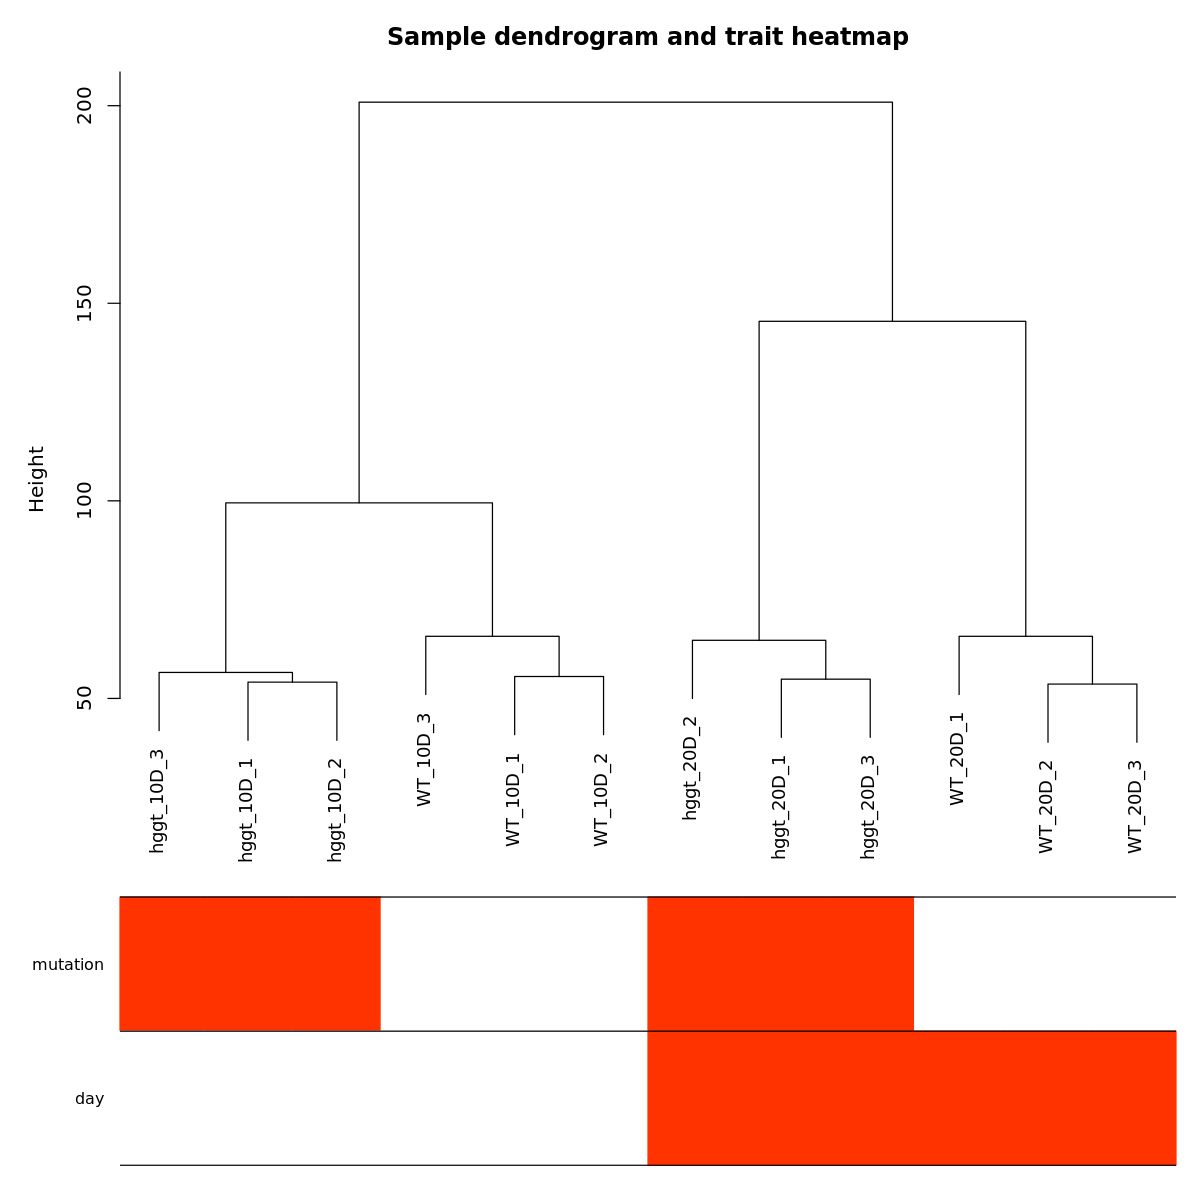

In [46]:
# Re-cluster samples
options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as needed
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = numbers2colors(allTraits, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(allTraits), 
                    main = "Sample dendrogram and trait heatmap")